<a href="https://colab.research.google.com/github/Moinuddinsk01/CodeWay-Tasks/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

In [6]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [7]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [31]:
data = pd.concat([train,test])

Performing EDA to get some insights from the data before trainging the model


In [5]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [15]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
print("Records and features in train, test and concatinated data")
print(train.shape)
print(test.shape)
print(data.shape)

Records and features in train, test and concatinated data
(19476, 23)
(19466, 23)
(38942, 23)


In [10]:
#Handling missing values
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     2
state                    2
zip                      2
lat                      2
long                     2
city_pop                 2
job                      2
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

We can see that there are very less number of null values in our data. So I am removing that data to make our model more accurate.


In [32]:
data = data.dropna(axis=0)

In [13]:
print("No of records after dealing with null values")
print(data.shape)

No of records after dealing with null values
(38940, 23)


In [16]:
#Check the distribution of the target variable
print(data['is_fraud'].value_counts())


0.0    38740
1.0      200
Name: is_fraud, dtype: int64


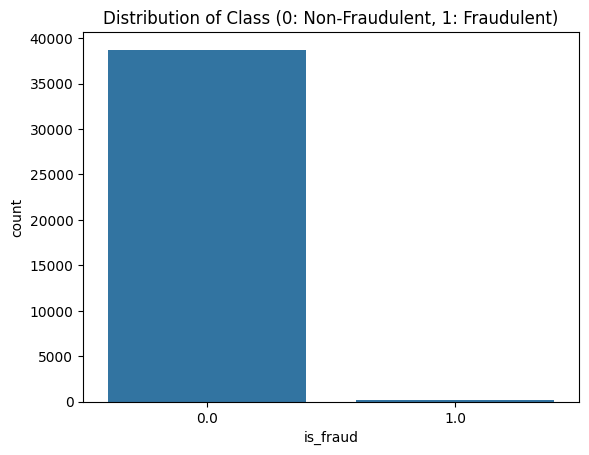

In [18]:
#Visualize the distribution of the target variable
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()

By seeing this graph, we can say that data that we are having is unbalanced.

In [22]:
#Check the correlation between features
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-22-240f1dfaaf88>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.007765,0.012905,-0.008930,-0.002478,0.006638,-0.009883,0.009553,-0.001743,0.006399,0.022049
cc_num,0.007765,1.000000,0.001418,0.051926,-0.071033,-0.056152,-0.009496,-0.003521,-0.070699,-0.056104,-0.020373
amt,0.012905,0.001418,1.000000,-0.015406,0.015322,0.009760,0.001785,-0.005800,0.015311,0.009700,0.232525
zip,-0.008930,0.051926,-0.015406,1.000000,-0.116351,-0.905926,0.071787,-0.008622,-0.115385,-0.905267,-0.023640
lat,-0.002478,-0.071033,0.015322,-0.116351,1.000000,-0.017456,-0.154752,0.002749,0.993704,-0.017193,0.019976
long,0.006638,-0.056152,0.009760,-0.905926,-0.017456,1.000000,-0.043612,0.011373,-0.017610,0.999136,0.004946
city_pop,-0.009883,-0.009496,0.001785,0.071787,-0.154752,-0.043612,1.000000,-0.000636,-0.154049,-0.043612,-0.000433
unix_time,0.009553,-0.003521,-0.005800,-0.008622,0.002749,0.011373,-0.000636,1.000000,0.001860,0.011216,-0.022732
merch_lat,-0.001743,-0.070699,0.015311,-0.115385,0.993704,-0.017610,-0.154049,0.001860,1.000000,-0.017366,0.019870
merch_long,0.006399,-0.056104,0.009700,-0.905267,-0.017193,0.999136,-0.043612,0.011216,-0.017366,1.000000,0.005095


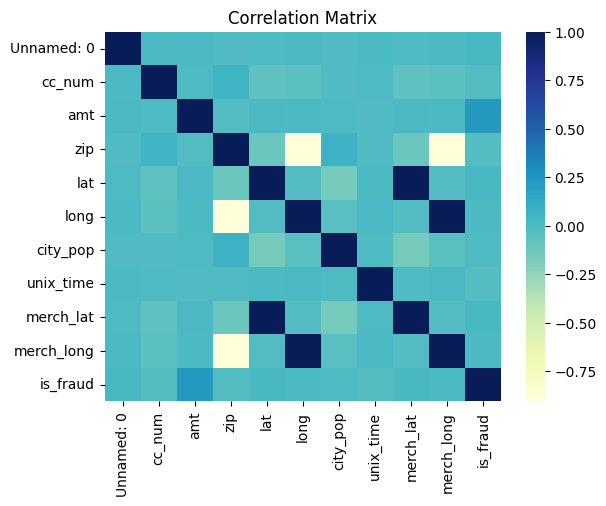

In [23]:
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [24]:
correlation_matrix.abs()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.007765,0.012905,0.008930,0.002478,0.006638,0.009883,0.009553,0.001743,0.006399,0.022049
cc_num,0.007765,1.000000,0.001418,0.051926,0.071033,0.056152,0.009496,0.003521,0.070699,0.056104,0.020373
amt,0.012905,0.001418,1.000000,0.015406,0.015322,0.009760,0.001785,0.005800,0.015311,0.009700,0.232525
zip,0.008930,0.051926,0.015406,1.000000,0.116351,0.905926,0.071787,0.008622,0.115385,0.905267,0.023640
lat,0.002478,0.071033,0.015322,0.116351,1.000000,0.017456,0.154752,0.002749,0.993704,0.017193,0.019976
long,0.006638,0.056152,0.009760,0.905926,0.017456,1.000000,0.043612,0.011373,0.017610,0.999136,0.004946
city_pop,0.009883,0.009496,0.001785,0.071787,0.154752,0.043612,1.000000,0.000636,0.154049,0.043612,0.000433
unix_time,0.009553,0.003521,0.005800,0.008622,0.002749,0.011373,0.000636,1.000000,0.001860,0.011216,0.022732
merch_lat,0.001743,0.070699,0.015311,0.115385,0.993704,0.017610,0.154049,0.001860,1.000000,0.017366,0.019870
merch_long,0.006399,0.056104,0.009700,0.905267,0.017193,0.999136,0.043612,0.011216,0.017366,1.000000,0.005095


Since the upper triangle and lower triangle matrices are same, we shall consider any one of them.


In [25]:
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool_))
upper_matrix.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,NaN,0.007765,0.012905,-0.008930,-0.002478,0.006638,-0.009883,0.009553,-0.001743,0.006399,0.022049
cc_num,NaN,NaN,0.001418,0.051926,-0.071033,-0.056152,-0.009496,-0.003521,-0.070699,-0.056104,-0.020373
amt,NaN,NaN,NaN,-0.015406,0.015322,0.009760,0.001785,-0.005800,0.015311,0.009700,0.232525
zip,NaN,NaN,NaN,NaN,-0.116351,-0.905926,0.071787,-0.008622,-0.115385,-0.905267,-0.023640
lat,NaN,NaN,NaN,NaN,NaN,-0.017456,-0.154752,0.002749,0.993704,-0.017193,0.019976


In [26]:
drop_columns = [col for col in upper_matrix if any(upper_matrix[col]>0.65)]
print(drop_columns)

['merch_lat', 'merch_long']


These are features are highly correlated. So we shall move with of them. I will choose `'merch_lat'`

In [33]:
data = data.drop(['merch_long'], axis = 1)

In [34]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'is_fraud'],
      dtype='object')

Feature Selection

In [43]:
le = LabelEncoder()
data.drop(data.columns[0], axis=1, inplace=True)
features = data.columns
for i in features:
  if data[i].dtype=='object':
    data[i] = le.fit_transform(data[i])
    data.fillna(method='ffill',inplace=True)

In [83]:
X = data.drop('is_fraud', axis=1)
y= data.is_fraud

In [84]:
# Handling and dealing with unbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# rus = RandomUnderSampler()
# X, y = rus.fit_resample(X, y)


# ros = RandomOverSampler()
# X, y = ros.fit_resample(X, y)


# sampler = SMOTE()
# X, y = sampler.fit_resample(X, y)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [88]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [89]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [90]:
# Model Evaluation
def evaluating_model(model, predictions):
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [91]:
# Evaluating each model
evaluating_model(logistic_model, logistic_predictions)
print("---------------------------")
evaluating_model(tree_model, tree_predictions)
print("---------------------------")
evaluating_model(random_forest_model, random_forest_predictions)

Model: LogisticRegression
Accuracy: 0.9947354904982023
Confusion Matrix:
[[7747    5]
 [  36    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7752
         1.0       0.00      0.00      0.00        36

    accuracy                           0.99      7788
   macro avg       0.50      0.50      0.50      7788
weighted avg       0.99      0.99      0.99      7788

---------------------------
Model: DecisionTreeClassifier
Accuracy: 0.9969183359013868
Confusion Matrix:
[[7740   12]
 [  12   24]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7752
         1.0       0.67      0.67      0.67        36

    accuracy                           1.00      7788
   macro avg       0.83      0.83      0.83      7788
weighted avg       1.00      1.00      1.00      7788

---------------------------
Model: RandomForestClassifier
Accuracy: 

Among `LogisticRegression`, `DecisionTreeClassifier` and `RandomForestClassifier`, `RandomForestClassifier` worked well with accuracy of 98%.
